[Previously](/posts/turbulent_jet_notes/) I worked through the velocity profiles for turbulent jets and left off claiming that everything else of interest followed simply from those profiles. This time I am going to follow through by sketching out how to derive the concentration profile and volumetric flow rate.

## Concentration

For hazard identification, among other purposes, what one often wants is not the velocity distribution of the jet, but the concentration profile. For example, suppose a vessel develops a small hole and a jet of process fluid is exiting out into the air, to determine how bad that is and what sort of hazard is presented (explosive, toxic, etc.) we first need to determine the concentration profile.

Suppose the concentration of a species *A* is *c<sub>A</sub>*, for the sake of simplicity let this be a time-averaged concentration done in a way that is consistent with Reynolds averaging.[^units]

[^units]:Note the concentration is given in units of $[[ quantity ]] \times [[length]]^{-3}$, e.g. kmol/m³

The continuity equation for species A is given by[@bird-2007 page 850]

$$ {\mathrm{D} \over \mathrm{D}t} c_A = - \nabla \cdot \mathbf{J}_A + r_A $$

where **J** is the molar flux and *r* is the rate of reaction[^molar-flux]

[^molar-flux]:The molar flux  **J** is the *time averaged* molar flux and is the sum of both viscous and turbulent terms. $\mathbf{J}_A = \mathbf{J}_A^{(v)} + \mathbf{J}_A^{(t)}$

In cylindrical coordinates this is:

$$ {\partial c_A \over \partial t}  + \bar{v}_r {\partial c_A \over \partial r} + {\bar{v}_{\theta} \over r } {\partial c_A \over \partial \theta} + \bar{v}_z {\partial c_A \over \partial x} $$

$$ = -\left[ {1 \over r} {\partial \over \partial r} \left(r J_{A,r}\right) + {1 \over r} {\partial \over \partial \theta} J_{A,\theta} + {\partial \over \partial z} J_{A,z} \right] + r_A$$

Making the following assumptions:

1. Steady state ( ${\partial \over \partial t} \left( \dots \right) = 0$ )
1. Axisymmetric ( ${\partial \over \partial \theta} \left( \dots \right) = 0$ )
1. [Boundary layer approximation](/posts/turbulent_jet_notes/#equations-of-motion) ( $\vert {\partial c_A \over \partial z} \vert \ll \vert {\partial c_A \over \partial r} \vert$ )
1. Non-reacting ( $r_A = 0$ )

This simplifies down to

$$ \bar{v}_r {\partial c_A \over \partial r} +  \bar{v}_z {\partial c_A \over \partial z} = {-1 \over r} {\partial \over \partial r} \left( r J_{A,r} \right) $$

We suppose that, much like the velocity profile, the concentration profile is self-similar. That is, at any given downstream distance *z* the profile has the same shape, just scaled and stretched.

$$ c_A = {k_c \over z} g\left(\xi\right) $$

where &xi; is *r/z* and *k<sub>c</sub>* is some constant to be determined. From this we can work out some useful partial derivatives

$$ {\partial c_A \over \partial r} = {k_c \over z^2} g^{\prime}\left(\xi\right) $$

$$ {\partial c_A \over \partial z} = {-k_c \over z^2} \left[ g\left(\xi\right) + \xi g^{\prime}\left(\xi\right) \right]$$

recalling the [velocity profiles](/posts/turbulent_jet_notes/#stokes-stream-function) in terms of *F(&xi;)* and substituting into the equation of continuity we arrive at

$${ k k_c \over z^2 } {d \over d\xi} \left(F g\right) = -{ \partial \over \partial r} \left( r J_{A,r} \right)$$

Which gives us our path forward: find a model for $J_{A,r}$ and substitute into the right hand side of the equation, integrate both sides and solve for *g* in terms of *F* and &xi;.

### Prandtl mixing length models

We are going to assume that the overall molar flux is proportional to the concentration gradient and some mixing length[@bird-2007 page 659] *l*, that is

$$ J_{A,r} = -l_c^2 \left\vert \partial \bar{v}_z \over \partial r \right\vert \left(\partial c_A \over \partial r \right)$$

we assume the mixing length is proportional to the downstream distance for the same reasons as when we [derived the velocity profile](/posts/turbulent_jet_notes/#prandtl-mixing-length) and, anticipating the form of the constants from how it worked out for the velocity distribution, $l_c = a_c^{3/2} z$

Putting this into the equation of continuity for *A* and doing some rearranging gives

$${ k k_c \over z^2 } {d \over d\xi} \left(F g\right) = { k k_c \over z^2 } a_c^3 {d \over d\xi}\left(g^{\prime}F^{\prime\prime} - {g^{\prime}F^{\prime} \over \xi} \right)$$

Cancelling some terms and integrating both sides gives us

$$ F g = a_c^3 \left(g^{\prime}F^{\prime\prime} - {g^{\prime}F^{\prime} \over \xi} \right) + \mathrm{const} $$

Where we can see from the [boundary conditions](/posts/turbulent_jet_notes/#boundary-conditions) that the constant of integration is zero. We can separate F and g

$$ {g^{\prime} \over g} = { a_c^{-3} F \over F^{\prime \prime} - {F^{\prime} \over \xi} }$$

and integrating both sides again, we arrive at

$$ \log{c_A \over c_{A,max} } = \log{g\left(\xi\right) \over g\left(0\right)} = a_c^{-3} \int_0^{\xi} {F \over F^{\prime \prime} - {F^{\prime} \over \xi} } d\xi$$

Note that, when setting up [the original ode](/posts/turbulent_jet_notes/#setting-up-the-ode), we had

$$ F F^{\prime} = a^3 \left( F^{\prime\prime} - {F^{\prime} \over \xi} \right)^2 $$

or

$$ F^{\prime\prime} - {F^{\prime} \over \xi} = \sqrt{ F F^{\prime} \over a^3 } $$

Making the substitution gives us an integral entirely in terms of *F*, *F′* and &xi;

$$ \log{g\left(\xi\right) \over g\left(0\right)} = a_c^{-3} a^{3/2} \int_0^{\xi} {F \over \sqrt{ F F^{\prime} } } d\xi$$

Taking the exponential of both sides gives us:

$$ {g\left(\xi\right) \over g\left(0\right)} = \left( \exp \left(\int_0^{\xi} {F \over \sqrt{ F F^{\prime} } } d\xi \right)\right)^{ a_c^{-3} a^{3/2} } $$

Which is something we can compute using [the ode solution from last time](/posts/turbulent_jet_notes/#solving-the-ode), by importing the code for the ode from the previous notebook and running it to get the velocity distribution.

In [1]:
#| output: false
# importing just the ODE solution

using NBInclude

@nbinclude("../turbulent_jet_notes/index.ipynb"; counters=[1 3])

Success

f_pml (generic function with 1 method)

We can then perform the integration numerically, in this case the cumulative integral

In [2]:
using NumericalIntegration: cumul_integrate

ϕ, F, F′ = sol.t, sol[1,:], sol[2,:]

# trim any unphysical values
F[ F.>0 ] .= 0.0
F′[F′.>0] .= 0.0


function intgrnd(F, F′) 
    if F == 0.0
        return 0.0
    elseif F′ == 0.0
        return -Inf
    else
        return F ./ .√(F.*F′)
    end
end
    
log_g = cumul_integrate(ϕ, intgrnd.(F, F′));

For some context we can plot the concentration along with the velocity, with the constants $a_c^{-3} a^{3/2} = 1$

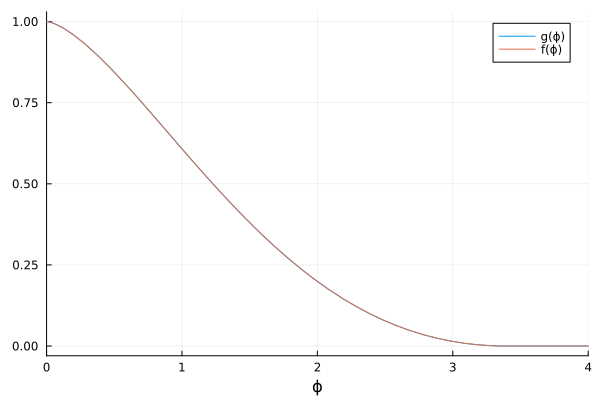

In [3]:
#| echo: false
#| label: fig-integration
#| fig-cap: "Comparison of the concentration profile to the velocity profile, Prandtl mixing length theory."

let

if !isdefined(Main, :plot)
    using Plots:plot, plot!
end
 
    
f_ϕ = -F′./ϕ
f_ϕ[1] = 1
    
plot(ϕ, exp.(log_g), lab="g(ϕ)", xlabel="ϕ", xlim=(0,4))
plot!(ϕ, f_ϕ, lab="f(ϕ)")
    
    
end

Well, that's interesting, it looks like we have arrived at

$$ {c_A \over c_{A,max} } = \left( \bar{v}_z \over \bar{v}_{z,max} \right)^{\mathrm{const} } $$

Which is, in fact, the case and is generally the case -- the Prandtl mixing length, eddy diffusion,  and Gaussian models work out to the same conclusion.

Consider the following derivative

$$ {d \over d\xi} \log{f\left(\xi\right)} = {d \over d\xi} \log \left( -F^{\prime} \over \xi \right) = {1 \over F^{\prime} } \left( F^{\prime\prime} - {F^{\prime} \over \xi} \right)$$

Recalling back to our original ode for the Prandtl mixing length velocity distribution, we had the relationship

$$ F F^{\prime} = a^3 \left( F^{\prime\prime} - {F^{\prime} \over \xi} \right)^2 $$

or

$$ {F \over F^{\prime\prime} - {F^{\prime} \over \xi} } = a^3 { {F^{\prime\prime} - {F^{\prime} \over \xi} } \over F^{\prime} } $$

and so

$$ {d \over d\xi} \log{f\left(\xi\right)} =  a^{-3} {F \over F^{\prime\prime} - {F^{\prime} \over \xi} } $$


and recalling that the integral we originally wished to solve was

$$ \log{c_A \over c_{A,max} } = a_c^{-3} \int_0^{\xi} {F \over F^{\prime \prime} - {F^{\prime} \over \xi} } d\xi$$

we get

$$ \log{c_A \over c_{A,max} } = \left(a \over a_c\right)^{3} \left[ \log \left( f\left(\xi\right) \over f\left(0\right) \right) \right] = \log \left( \bar{v}_z \over \bar{v}_{z,max} \right)^{\left(a \over a_c\right)^{3} } $$

and finally

$$ { c_A \over c_{A,max} } = \left( \bar{v}_z \over \bar{v}_{z,max} \right)^{\left(a \over a_c\right)^{3} }$$

Where, rather pleasingly, the constant ${\left(a \over a_c\right)^{3} }$ works out to be the ratio of the mixing lengths, all squared[^constant]

$$ {\left(a \over a_c\right)^{3} } = \left( l \over l_c \right)^2 $$

[^constant]:Suppose an "equivalent" eddy viscosity for the Prandtl mixing length model of 
    
    $$\varepsilon = -l^2 \left\vert \partial \bar{v}_z \over \partial r \right\vert$$ 
    
    and eddy diffusivity of 
    
    $$\mathscr{D}_{AB} = -l_c^2 \left\vert \partial \bar{v}_z \over \partial r \right\vert$$ 
    
    the turbulent [Schmidt number](https://en.wikipedia.org/wiki/Schmidt_number) is then 
    
    $$\mathrm{Sc} = {\varepsilon \over \mathscr{D}_{AB} } = \left( l \over l_c \right)^2$$ 
    
    making the final result 
    
    $${c_A \over c_{A,max} } = \left( \bar{v}_z \over \bar{v}_{z,max} \right)^{Sc}$$


We can now plot the concentration profile along with the velocity profile and see that the two profiles have a similar shape, with the concentration profile stretched to be wider. Concentration spreads out more than velocity.

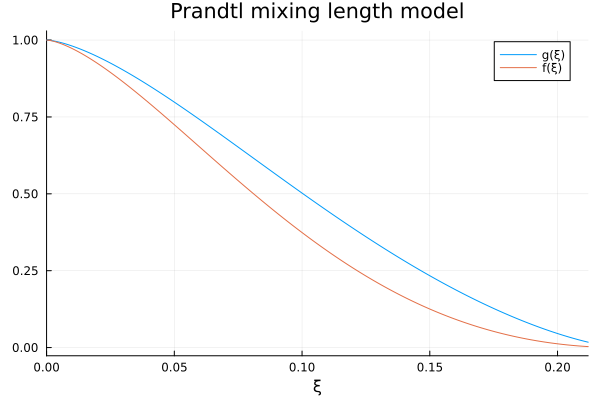

In [4]:
#| echo: false
#| label: fig-pml-conc
#| fig-cap: "The dimensionless concentration profile and velocity profile, Prandtl mixing length theory."

let

if !isdefined(Main, :plot)
    using Plots:plot, plot!
end
 
g(ξ, Sc=0.7)  = f_pml(ξ)^Sc

b_half = 0.0848
rbs = 0.0:0.01:2.5
ξs = b_half*collect(rbs)
    
plot(ξs, g.(ξs), lab="g(ξ)", xlabel="ξ", xlim=(0,2.5*b_half))
plot!(ξs, f_pml.(ξs), lab="f(ξ)")
plot!(title="Prandtl mixing length model")
    
end

### Eddy diffusivity models

In the eddy diffusivity model we assume the molar flux is proportional to the concentration gradient with the constant of proportionality being an effective diffusivity, the eddy diffusivity. In some treatments the viscous and turbulent diffusivities are treated separately, in this model we lump it all together into one constant

$$ J_{A,r} = -\mathscr{D}_{AB} {\partial c_A \over \partial r} $$

where $\mathscr{D}_{AB}$ is the eddy diffusivity for species A. Using the definition of *c<sub>A</sub>* we can work out the right hand side of the equation of continuity for A

$$ -{ \partial \over \partial r} \left( r J_{A,r} \right) = {k_c \over z^2} \mathscr{D}_{AB} {d \over d\xi} \left( \xi g^{\prime} \right) $$

putting that into the equation of continuity for A, we get

$${ k k_c \over z^2 } {d \over d\xi} \left(F g\right) =  {k_c \over z^2} \mathscr{D}_{AB} {d \over d\xi} \left( \xi g^{\prime} \right) $$

cancelling some terms and integrating once gives us

$$k F g =  \mathscr{D}_{AB} \xi g^{\prime} + \mathrm{const}$$

where, by use of [boundary conditions](/posts/turbulent_jet_notes/#boundary-conditions), the constant of integration is zero. This can be rearranged to isolate F and g

$$ {g^{\prime} \over g} = {k \over \mathscr{D}_{AB} } {F \over \xi} $$

integrating once more

$$ \log \left( g\left(\xi\right) \over g\left(0\right) \right) = {k \over \mathscr{D}_{AB} } \int_0^{\xi} {F \over \xi} d\xi $$

recalling that, for the eddy diffusivity model

$$ F\left( \xi \right) = { - c \left( C_2 \xi \right)^2 \over {1 + \frac{1}{4} \left( C_2 \xi \right)^2 } } $$

$$ \int_0^{\xi} {F \over \xi} d\xi = {c} \int_0^{\xi} { -C_2^2 \xi \over {1 + \frac{1}{4} \left( C_2 \xi \right)^2 } } d\xi = {c} \log \left(1 + \frac{1}{4} \left( C_2 \xi \right)^2 \right)^{-2} $$

and so we have

$$ \log \left( g\left(\xi\right) \over g\left(0\right) \right) = {k c \over \mathscr{D}_{AB} } \log \left(1 + \frac{1}{4} \left( C_2 \xi \right)^2 \right)^{-2} $$

recalling that the constant *k* is related to the eddy diffusivity $\varepsilon$ by $\varepsilon=ck$, we have

$$ {c_A \over c_{A,max} } = \left( g\left(\xi\right) \over g\left(0\right) \right) = \left(1 + \frac{1}{4} \left( C_2 \xi \right)^2 \right)^{-2{\varepsilon \over \mathscr{D}_{AB} } } $$

and, looking back on the definition of *f(&xi;)* from the eddy viscosity model, we get[^eddy-schmidt-number]

$$ {c_A \over c_{A,max} } = \left( \bar{v}_z \over \bar{v}_{z,max} \right)^{\varepsilon \over \mathscr{D}_{AB} } $$

[^eddy-schmidt-number]: The turbulent [Schmidt number](https://en.wikipedia.org/wiki/Schmidt_number) is defined as the ratio of the eddy viscosity to the eddy diffusivity
    
    $$\mathrm{Sc} = {\varepsilon \over \mathscr{D}_{AB} }$$ 
    
    making the final result 
    
    $${c_A \over c_{A,max} } = \left( \bar{v}_z \over \bar{v}_{z,max} \right)^{Sc}$$


We can plot the concentration and velocity profiles for the eddy diffusivity model as well, and it is a similar story. The shapes of the profiles are the same but the concentration profile is stretched, such that concentration "spreads out" more than velocity does.

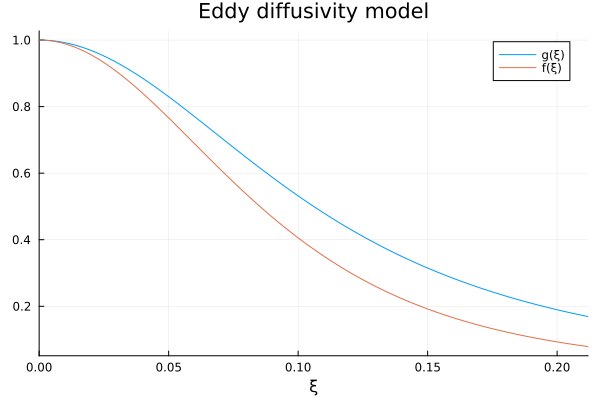

In [5]:
#| echo: false
#| label: fig-eddy-profiles
#| fig-cap: "The dimensionless concentration profile and velocity profile, Eddy diffusivity model."

let

if !isdefined(Main, :plot)
    using Plots:plot, plot!
end
 
f(ξ; C₂=15.1) = ( 1 + (C₂*ξ/2)^2 )^-2
g(ξ, Sc=0.7)  = f(ξ)^Sc

b_half = 0.0848
rbs = 0.0:0.01:2.5
ξs = b_half*collect(rbs)
    
plot(ξs, g.(ξs), lab="g(ξ)", xlabel="ξ", xlim=(0,2.5*b_half))
plot!(ξs, f.(ξs), lab="f(ξ)")
plot!(title="Eddy diffusivity model")
    
end

### Gaussian models

The [standard Gaussian model](/posts/turbulent_jet_notes/#empirical-velocity-profiles) was defined as

$$ f\left(\xi\right) = \exp \left( -c \xi^2 \right) $$

where the constant *c* (note: not the concentration) was found to be

$$ c = \log{2} \left(z \over b_{1/2}\right)^2 = \log{2} \left(1 \over \beta\right)^2 $$

where I am introducing the constant *&beta;* to represent the spreading constant (i.e. the ratio of *b* to *z*) mostly to cut down on all the constants I call *c* given that I am also using *c* to represent concentrations.

We can then write the velocity distribution as

$$ f\left(\xi\right) = \exp \left( -c \xi^2 \right) = \exp \left( -\log{2} \left(\xi \over \beta\right)^2 \right) = \exp \left(- \log 2 \left(\xi \over \beta\right)^2 \right)$$

The concentration distribution is similarly defined empirically in terms of a half-width, $b_{1/2,c}$ and entirely analogously we end up with a distribution

$$ g\left(\xi\right) = \exp \left( -\log 2 \left(\xi \over \beta_c\right)^2 \right)$$

where *&beta;<sub>c</sub>* is the spreading constant for the concentration profile. But it's fairly easy to see that this is equivalent to

$$ g\left(\xi\right) = \exp \left( -\log 2 \left(\xi \over \beta\right)^2 \left(\beta \over \beta_c\right)^2 \right) = f\left(\xi\right)^{\left(\beta \over \beta_c\right)^2} $$

or[^gaussian-schmidt-number]

$$ {c_A \over c_{A,max} } = \left({\bar{v}_z \over \bar{v}_{z,max} }\right)^{\left(\beta \over \beta_c\right)^2} $$

[^gaussian-schmidt-number]: We can argue, in a manner analogous to the Prandtl mixing length theory, that the eddy viscosity is proportional to the characteristic length squared, and similarly for the eddy diffusivity and thus the turbulent [Schmidt number](https://en.wikipedia.org/wiki/Schmidt_number) is then 
    
    $$\mathrm{Sc} = {\varepsilon \over \mathscr{D}_{AB} } = \left( b_{1/2} \over b_{1/2,c} \right)^2 = \left( \beta \over \beta_c \right)^2$$ 
    
    thus making the final result 
    
    $${c_A \over c_{A,max} } = \left( \bar{v}_z \over \bar{v}_{z,max} \right)^{Sc}$$

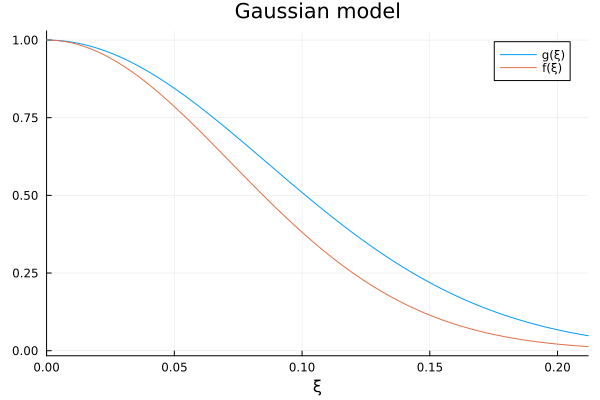

In [6]:
#| echo: false
#| label: gaussian-profiles
#| fig-cap: "The dimensionless concentration profile and velocity profile, Gaussian empirical model."

let

if !isdefined(Main, :plot)
    using Plots:plot, plot!
end
 
f(ξ; b=0.0848) = 2^(-(ξ/b)^2)
g(ξ, Sc=0.7)  = f(ξ)^Sc

b_half = 0.0848
rbs = 0.0:0.01:2.5
ξs = b_half*collect(rbs)

plot(ξs, g.(ξs), lab="g(ξ)", xlabel="ξ", xlim=(0,2.5*b_half))
plot!(ξs, f.(ξs), lab="f(ξ)")
plot!(title="Gaussian model")
    
end

### Schmidt number

All three of the turbulent jet models looked at so far ended up with a concentration profile of

$${c_A \over c_{A,max} } = \left( \bar{v} \over \bar{v}_{z,max} \right)^{Sc} $$

where I declared the constant *Sc* to be the turbulent Schmidt number. There are, of course, several ways of arriving at this value but literature generally gives $Sc \approx 0.7$. This also tends to be the same value given for the turbulent Prandtl number, which is convenient.


| Sc    | Reference  |
|:-----:|:-----------|
| 0.7   | @bird-2007 |
| 0.73  | @kaye-2018 |

### Mass balance

Throughout all of this there has been a constant *k<sub>c</sub>* floating around, unaddressed. In practice this is usually a free parameter determined by fitting with experimental data. However it can also be determined by a mass balance.

The total molar flux through any plane *z=m* is the same for all *m* (in the region of fully developed flow),  which is to say

$$ n_A = \int_0^{2\pi} \int_0^{\infty}  c_A \bar{v}_z r dr d\theta = \mathrm{const} $$

We also know what total molar flux is from the initial conditions of the jet

$$ n_A = c_0 v_0 {\pi \over 4} d_0^2 $$

and we can write the integral for any downstream distance *z* 

$$ n_A = 2\pi \int_0^{\infty}  c_A \bar{v}_z r dr = 2 \pi k k_c \int_0^{\infty} \left(\bar{v}_z \over \bar{v}_{z,max} \right)^{Sc+1} \xi d\xi $$

and so we can write *k<sub>c</sub>* in terms of the other parameters

$$ k_c = { c_0 v_0 d_0^2 \over 8 k I_c } $$

where 

$$I_c = \int_0^{\infty} \left(\bar{v}_z \over \bar{v}_{z,max} \right)^{Sc+1} \xi d\xi$$

[recalling that](/posts/turbulent_jet_notes/#momentum-balance) $k = {v_0 d_0 \over \sqrt{8I} }$ where $$I = \int_0^{\infty} \left(\bar{v}_z \over \bar{v}_{z,max} \right)^{2} \xi d\xi$$

we can simplify this to

$$ k_c = \sqrt{I \over 8 I_c^2} c_0 d_0 $$

or

$$ {c_A \over c_0} = \sqrt{I \over 8 I_c^2} {d_0 \over z} \left(\bar{v}_z \over \bar{v}_{z,max} \right)^{Sc} $$

These integrals can get difficult to solve analytically -- except for the Gaussian case which is fairly simple -- but are very easy to estimate numerically.[^lit-constants]

[^lit-constants]:It is worth keeping in mind, when using the empirical constants provided in the literature, that they are often fitted parameters and as such mass and momentum conservation is not necessarily guaranteed.


As an example, suppose we wish to calculate the constant for the Prandtl mixing length model, we have already imported the solution to the ode for the velocity profile and it is a simple matter to numerically integrate (using the trapezoidal rule) the two integrals in question.

We still need two parameters to complete the integration, the parameter *a* and *a<sub>c</sub>* or, equivalently, *&beta;* and the Schmidt number *Sc*.

In [7]:
using NumericalIntegration: integrate

# solutions of the ode
ϕ, F′ = sol.t, sol[2,:]

# trim any unphysical values
F′[F′.>0] .= 0

# parameters of the model
β = 0.0848
a = β/1.2277667062444657
Sc = 0.7
f  = -F′./ϕ
ξ  = a.*ϕ

# momentum balance integrand
int = (f.^2).*ξ
int[ξ.≤0] .= 0

# mass balance integrand
int_c = (f.^(Sc+1)).*ξ
int_c[ξ.≤0] .= 0

I   = integrate(ξ, int)
I_c = integrate(ξ, int_c)

k_c = √(I/(8*I_c^2))

5.793131625321363

The other two models could also be integrated numerically, for example the eddy diffusivity model

In [8]:
using QuadGK: quadgk

C₂ = 2*√(√(2)-1)/β
f_ev(ξ) = ( 1 + (C₂*ξ/2)^2 )^-2

I, err   = quadgk((ξ) -> ξ*f_ev(ξ)^2, 0, Inf)
I_c, err = quadgk((ξ) -> ξ*f_ev(ξ)^(Sc+1), 0, Inf)

k_c = √(I/(8*I_c^2))

5.258197856093409

and the Gaussian model

In [9]:
c = log(2)/β^2
f_emp(ξ) = exp(-c*ξ^2)

I, err   = quadgk((ξ) -> ξ*f_emp(ξ)^2, 0, Inf)
I_c, err = quadgk((ξ) -> ξ*f_emp(ξ)^(Sc+1), 0, Inf)

k_c = √(I/(8*I_c^2))

5.900934664729694

In these cases I followed my convention from the previous notebook of setting each of the velocity distributions to have the same width at half height, and using the same Schmidt number for the concentration profiles. This makes it more of an "apples to apples" comparison.

Looking at the results we see that the constant for the concentration is smaller than the velocity profiles, indicating that the centerline concentration drops off faster than the velocity. Which makes some sense as we saw above that the concentration also spreads out radially more than the velocity.

We can combine the velocity and concentration profiles and get a sense of how the jet expands. Note that the plot is looking at the fully-developed jet, in this case ~4 diameters downstream.

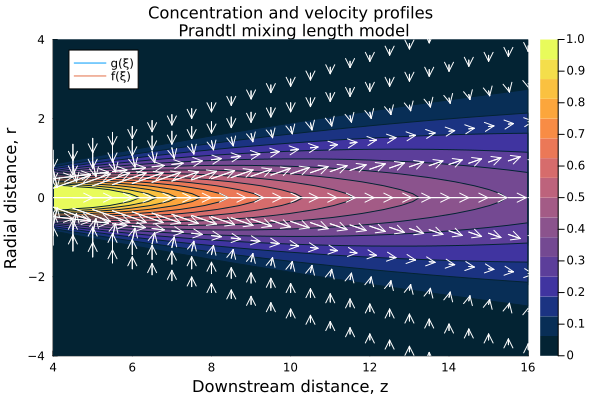

In [10]:
#| echo: false
#| label: fig-flow-field
#| fig-cap: "The flowfield and concentration contours for an example turbulent jet, Prandtl mixing length model"

let

# solutions of the ode
ϕ, F′ = sol.t, sol[2,:]

# trim any unphysical values
F′[F′.>0] .= 0

# paramters of the model
β = 0.0848
a = β/1.2277667062444657
Sc = 0.7
f  = -F′./ϕ
ξ  = a.*ϕ

# momentum balance integrand
int = (f.^2).*ξ
int[ξ.≤0] .= 0
I = integrate(ξ, int)
k = 1/√(8*I)

# mass balance integrand
int_c = (f.^(Sc+1)).*ξ
int_c[ξ.≤0] .= 0
I_c = integrate(ξ, int_c)
k_c = √(I/(8*I_c^2))

# velocity field
function vz(ξ)
    ϕ = abs(ξ)/a
    if ϕ >0
        F, F′ = sol(ϕ)
        F′ = min(F′,0)
        f = -F′/ϕ
        f  = max(f, 0)
    else
        f = 1
    end
    return f
end

function vr(ξ)
    ϕ = abs(ξ)/a
    if ϕ >0
        F, F′ = sol(ϕ)
        F, F′ = min(F,0), min(F′,0)
        f = (F/ϕ)-F′
    else
        f = 0
    end
    return sign(ξ)*f
end

function vel(z,r)
    ξ = z>0 ? r/z : 0
    u = (k/z)*vz(ξ)
    v = (k/z)*vr(ξ)
    norm = √(u^2+v^2)
    if norm>1
        u = u/norm
        v = v/norm
    end
    return [u, v]
end

# concentration
function conc(z,r)
    ξ = z>0 ? r/z : 0
    ϕ = abs(ξ)/a
    if ϕ >0
        F, F′ = sol(ϕ)
        F′ = min(F′,0)
        f = -F′/ϕ
        f  = max(f, 0)
    else
        f = 1
    end
    return min(k_c*(f^0.7)/z,1)
end

zs = 4:0.5:16
ξs = -0.3:0.06:0.3
rs = -4:0.1:4
        
xxs = [z for z in zs for ξ in ξs]
yys = [ξ*z for z in zs for ξ in ξs]

plot!(zs, rs, conc, seriestype=:contour, c=:thermal, fill=true, clim=(0,1))
plot!(xxs, yys, seriestype=:quiver, quiver=vel, color=:white)
plot!(title="Concentration and velocity profiles\n Prandtl mixing length model",
      xlabel="Downstream distance, z", ylabel="Radial distance, r",
      titlefontsize=11, xlim=(4,16), ylim=(-4,4))


end

### Practical considerations

In most practical cases I've encountered, by far the easiest approach is to use a standard Gaussian model with parameters from literature. That said, there is a lot of variability of recommended parameters and some thought needs to go into what the model is being used for. Consider the following table giving model parameters for various gaseous jets entering into air.[@long-1963 page 7]


$$ {c_A \over c_0} = k_2 {d_0 \over z} \sqrt{ \rho_a \over \rho_j} \exp \left( - \left(k_3 {r \over z} \right)^2 \right) $$


| Jet                | Re        | $k_2$ | $k_3$ |
|:------------------:|:---------:|:-----:|:-----:|
| CO₂                | 50 000    | 5.4   | 9.2   |
| N₂                 | 27 000    | 5.4   | 7.9   |
| He                 |  3 400    | 4.1   | 5.3   |
| air + 1.1% towngas | 67 000    | 5.3   | 8.8   |
| hot air            | 67 000    | 5.3   | 8.8   |
| air + N₂O tracer   | 27-57 000 | 4.5   | 7.1   |
| hot air            | 18-25 000 | 4.5   | 7.1   |
| hot air            | 30-60 000 | 5.3   | 7.8   |
| hot air            | 10-20 000 | 5.0   | 6.4   |
| hot air            | ---       | 4.8   | 7.1   |
| hot air            | ---       | 5.9   | 7.7   |


Below is a plot showing the range of values this generates for the Gaussian jet model, along with the *recommended* parameters for use when estimating the extent of a hazardous area around a vent.[^conservative] The range of values is quite wide.

[^conservative]: Clearly the recommendation is a conservative approach, which is what you would want for a hazard analysis.

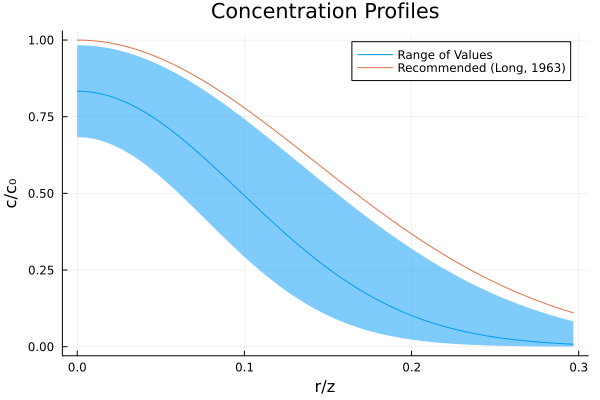

In [11]:
#| echo: false
#| label: fig-long-profile
#| fig-cap: "Gaussian concentration profile, range of values and recommended constants from @long-1963"

let

if !isdefined(Main, :plot)
    using Plots:plot, plot!
end

b_half = 0.0848
x = b_half*collect(0.0:0.01:3.5)
z = 6

g(k₁, k₂) = @. (k₁/z)*exp(-(k₂*x)^2)
y = g(5.0, 7.25)
yᵣ= g(6.0, 5.0)

plot(x, y; lab ="Range of Values",
     ribbon = ( abs.(y.-g(4.1,9.2)) , abs.(y.-g(5.9,5.3)) ) )
plot!(x, yᵣ; lab="Recommended (Long, 1963)")
plot!(; title="Concentration Profiles", xlabel="r/z", ylabel="c/c₀")

end

It is also worth noting that the concentration model breaks down when $z<k_2$, it will register concentrations greater than is possible. The normal way of dealing with this is a so-called top-hat model: chop off any concentrations $c_A > c_0$, though if the region of interest is primarily very close to the hole a different model should be used.

## Temperature

The temperature profiles follow directly from the velocity profiles in an entirely analogous way to concentration. The temperature profile is given by:

$$ {T - T_a \over T_0 - T_a} = k_T {d_0 \over z} \left( \bar{v}_z \over \bar{v}_{z,max} \right)^{Pr} $$

Where *T<sub>a</sub>* is the ambient temperature, *T<sub>0</sub>* is the jet temperature, and *Pr* is a turbulent [Prandtl number](https://en.wikipedia.org/wiki/Turbulent_Prandtl_number). The constant *k<sub>T</sub>* is then determined by an energy balance, again entirely analogously to the case for concentration.

## Volumetric Flow

The volumetric flow-rate of the jet grows with the downstream distance, as the jet entrains the surrounding fluid. This can be calculated from an integral of the velocity distribution

$$ Q = \int_0^{2\pi} \int_0^{\infty} \bar{v}_z r dr d\theta $$

recalling [the definition](/posts/turbulent_jet_notes/#stokes-stream-function) of $\bar{v}_z$ in terms of the function *F* and making the change of variables to &xi;

$$ Q = \int_0^{2\pi} \int_0^{\infty} {-k \over z} {F^{\prime} \over \xi} (z \xi) z d\xi d\theta $$

$$   = 2 \pi k z \int_0^{\infty} -F^{\prime} d\xi $$

$$   = 2 \pi k z \left[ -F\left(\xi\right) \right]_{0}^{\infty} $$

let's define the limit

$$ \lim_{\xi \to \infty} F\left(\xi\right) = F_{\infty}$$

and recall that from boundary conditions *F(0)=0*, so

$$ \left[ -F\left(\xi\right) \right]_{0}^{\infty} = -F_{\infty} $$

recalling the definition of *k*

$$ k = {v_0 d_0 \over \sqrt{8 I} }$$

and putting it all together we get

$$ Q = -{ 2 \pi \over \sqrt{8 I} } F_{\infty} v_0 d_0 z  $$

It is often more convenient to put things in in dimensionless terms, so let

$$ Q_0 = {\pi \over 4} v_0 d_0^2 $$

which gives us

$$ {Q \over Q_0} = - \sqrt{8 \over I} F_{\infty} {z \over d_0} $$

we can define a new constant *k<sub>Q</sub>*

$$ k_Q = - \sqrt{8 \over I} F_{\infty} $$

and finally

$$ {Q \over Q_0} = k_Q {z \over d_0} $$

Where $k_Q$ is some constant defined by the particular model and the corresponding model parameter.

For the Prandtl mixing length model we can compute this constant numerically

In [12]:
a = β/1.2277667062444657

I   = integrate(ξ, int)
F∞  = a^2*sol[1,end]

k_Q = -√(8/I)*F∞

0.3026722591952044

For the eddy viscosity model this can be worked out analytically to be
$$k_Q = {4\sqrt{3} \over C_2}$$

In [13]:
C₂ = 2*√(√(2)-1)/β

k_Q = 4*√3/C₂

0.4564301431180997

The Gaussian model can also be worked out analytically, giving
$$k_Q = {4 \over \sqrt{2 c}}$$

In [14]:
c = log(2)/β^2

k_Q = 4/√(2*c)

0.28808995465769605

The literature[@rajaratnam-1974] gives $k_Q = 0.32$ which compares well with the calculations above. Though it's worth noting that the eddy viscosity model over predicts the volumetric flow rate quite noticeably, this is not surprising considering that it has fatter tails than either the Prandtl mixing length model or the Gaussian model. In the tails is where the eddy viscosity model no longer matches well with the observed data, so this is just a weakness of the model itself.

## Conclusions

This was just a brief tour of the different parameters that can be calculated from the velocity distribution or stream function, once it is known. In practice, very often the constants encountered along the way are treated like fitting parameters and so it is always worth keeping in mind what the model is being used for and what conditions must be strictly followed or not. For example, if one wants a very accurate fit to concentration, that may result in mass no longer being conserved because a model may not have enough degrees of freedom to fit the one and guarantee the other.

If you are not fitting data, there is a wide range of parameters given in the literature and I think it is more important to find a set of parameters that work for the situation of interest -- for whichever model they were fit, but generally it is Gaussian -- than it is to fiddle around in the margins of whether or not one should use a Prandtl mixing length model versus an eddy viscosity model. Very often the answer is going to be Gaussian because that's what the best model in the literature was fit to.

## References
::: {#refs}
:::